In [1]:
# 统计一阶邻居分类个数
import dgl
import os 
from multiprocessing import Pool
import pickle
import torch
import numpy as np

[Using backend: pytorch
13:59:54] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: libtorch_cuda_cpp.so: cannot open shared object file: No such file or directory


In [28]:
base_path='./dataset'
graphs, _ = dgl.load_graphs(os.path.join(base_path, 'graph.bin'))
graph = graphs[0]
# graph = dgl.add_self_loop(graph)

In [29]:
with open(os.path.join(base_path, 'k_fold_labels.pkl'), 'rb') as f:
    label_data = pickle.load(f)
    labels = label_data['label']

In [30]:
# test_num = 2000
test_num = graphs[0].num_nodes()
workers = 2
nids = range(test_num)

In [31]:
def count_map(nid):
    g_out = dgl.sampling.sample_neighbors(graph, [nid], -1, edge_dir='out')
    g_in = dgl.sampling.sample_neighbors(graph, [nid], -1, edge_dir='in')
    src_out, dst_out = g_out.all_edges()
    src_in, dst_in = g_in.all_edges()
    # ids = torch.cat((dst_out, src_in), dim=-1).numpy()
    # ids = list(set(ids))
    in_labs = labels[src_in].reshape((-1))
    out_labs = labels[dst_out].reshape((-1))
    # print(ids, dst_out, src_in, labs)
    count_in = np.zeros(24)
    count_out = np.zeros(24)
    for i in in_labs:
        if i == -1:
            count_in[23]+=1
        else:
            count_in[i]+=1
    for i in out_labs:
        if i == -1:
            count_out[23]+=1
        else:
            count_out[i]+=1
    return [count_in, count_out]

In [32]:
count_map(44)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.])]

In [33]:
result = []
for nid in nids:
    result.append(count_map(nid))
result = np.array(result)
np.save(os.path.join(base_path, 'neighbors_class_count.npy'), result)
result.shape

In [ ]:
import pandas as pd
import numpy as np
result = np.load(os.path.join(base_path, 'neighbors_class_count.npy'))
df = pd.DataFrame(result, columns=range(24))

FileNotFoundError: [Errno 2] No such file or directory: './dataset/neighbors_class_count.npy'

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,...,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06
mean,1.902938e-02,2.823856e-01,4.769303e-01,5.707685e-01,3.964960e-01,2.709093e-01,1.284030e-01,3.857868e-01,1.315077e-01,9.418698e-02,...,8.910663e-02,1.908593e-01,1.101287e-01,1.647189e-01,7.047610e-02,8.912468e-02,1.692981e-01,2.472917e-01,7.454618e-02,1.063229e+01
std,2.490141e-01,2.055613e+00,3.002274e+00,4.286830e+00,4.244902e+00,1.893482e+00,9.144942e-01,1.402369e+00,1.254702e+00,6.337711e-01,...,1.027564e+00,1.774914e+00,9.824849e-01,1.404186e+00,1.048490e+00,1.015663e+00,1.928999e+00,1.983130e+00,6.637392e-01,3.315184e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
max,8.000000e+01,1.052000e+03,1.399000e+03,1.696000e+03,2.876000e+03,5.300000e+02,2.250000e+02,3.020000e+02,3.240000e+02,2.030000e+02,...,7.100000e+02,6.510000e+02,2.640000e+02,4.430000e+02,3.340000e+02,3.860000e+02,7.910000e+02,6.780000e+02,1.600000e+02,1.013200e+04


<AxesSubplot:>

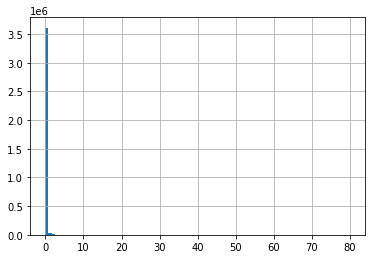

In [ ]:
df[0].hist(bins=100)

In [ ]:
df[23].hist(bins=100)

In [ ]:
df[df>100] = 100

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,...,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06,3.655452e+06
mean,1.902938e-02,2.795950e-01,4.702176e-01,5.528419e-01,3.813583e-01,2.689060e-01,1.282607e-01,3.853056e-01,1.310185e-01,9.415334e-02,...,8.844542e-02,1.882139e-01,1.099623e-01,1.635015e-01,6.989450e-02,8.861339e-02,1.662834e-01,2.442283e-01,7.449010e-02,9.650641e+00
std,2.490141e-01,1.676422e+00,2.384425e+00,2.785638e+00,2.584362e+00,1.687481e+00,8.925312e-01,1.351143e+00,1.197048e+00,6.260805e-01,...,8.794483e-01,1.425916e+00,9.585855e-01,1.247039e+00,9.615061e-01,9.241634e-01,1.509407e+00,1.614038e+00,6.535227e-01,1.480123e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
max,8.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
